In [127]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = np.asarray(Image.open('image_neural/porsche911.png'))
print(repr(img))


array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)


#Style Transfert - Deep Learning - Tensorflow
Inspired from https://www.tensorflow.org/tutorials/generative/style_transfer

In [128]:
image_12=img[1:200,1:200,1] # resize 

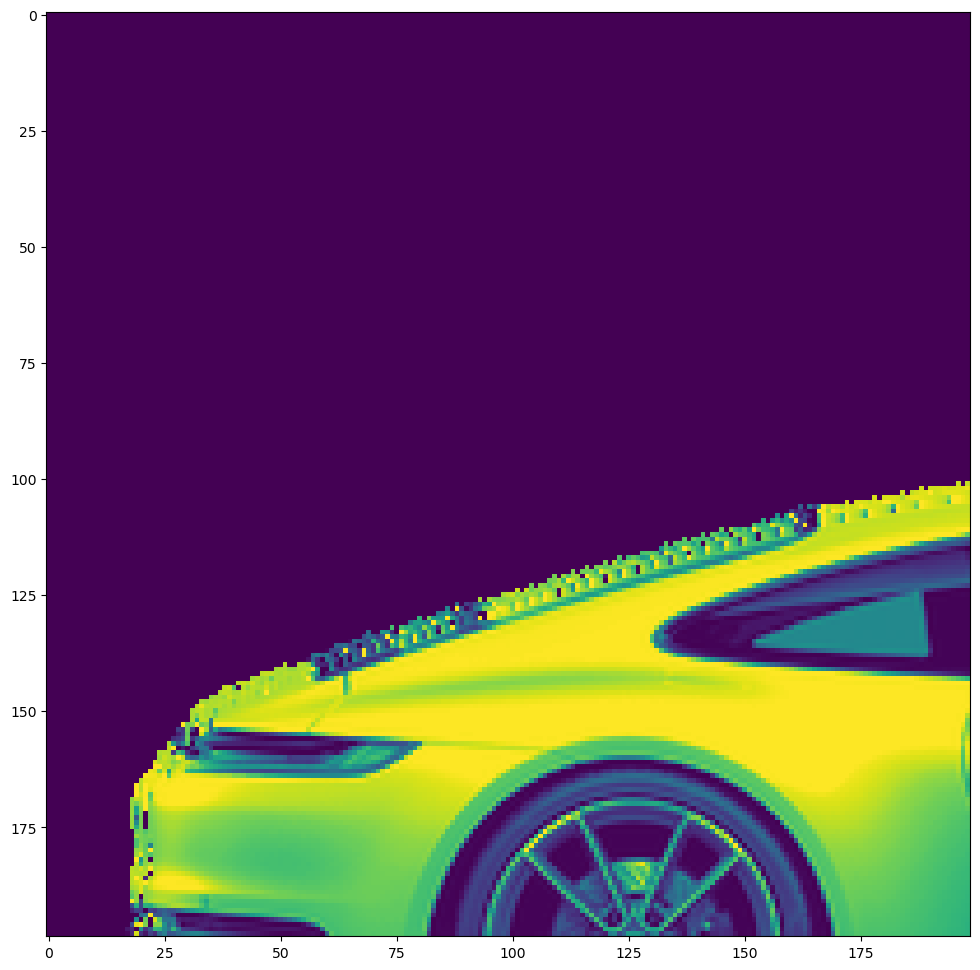

In [129]:
imgplot = plt.imshow(image_12)
plt.savefig("./output/porsche200200.png")

# Neural style transfer

In [130]:
import imageio
import glob
from tqdm import tqdm
import time

!pip install -q git+https://github.com/tensorflow/docs 

import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

from matplotlib import gridspec
import matplotlib.pylab as plt
import tensorflow_hub as hub

In [131]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

In [132]:

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  
  image_path=image_url
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path)[:,:,:3].astype(np.float32)[np.newaxis, ...]
  print(img.shape)
  if img.max() > 1.0:
    img = img / 255.  
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  fig = plt.gcf()
  fig.savefig('./output/all_images_generated_fast.png')
  plt.show()
  try:
    from google.colab import files
  except ImportError:
    pass
  else:
    files.download('./output/all_images_generated_fast.png')

In [133]:
content_image = "./image_neural/girafe.jpg"
style_image = "./style_image/google.jpg"  #@param ["anis-bw1.png", "DFI_Logo.png","blade_runner.jpg","mona_lisa.jpeg","paris.jpeg","picasso.jpeg","picasso_portrait.jpeg","san_francisco_bridge.jpeg","van_gogh_nuit.jpeg","guernica.jpg","hiroglyphs.jpeg","iron_man.jpeg","monet_water_lilies.jpg","mosaique_grecque.jpeg","persistance_dali.jpeg","pikachu.jpeg","prehistoire.jpeg"]
#style_image = ["./style_image/google.jpg","./style_image/neural.jpg"]


output_img_size = 512 # @param {type:"integer"}
content_img_size = (output_img_size, output_img_size)
style_img_size = (256, 256)
content_image = load_image(content_image, content_img_size)
style_image = load_image(style_image, style_img_size)


(1, 1440, 2560, 3)
(1, 3335, 5000, 3)


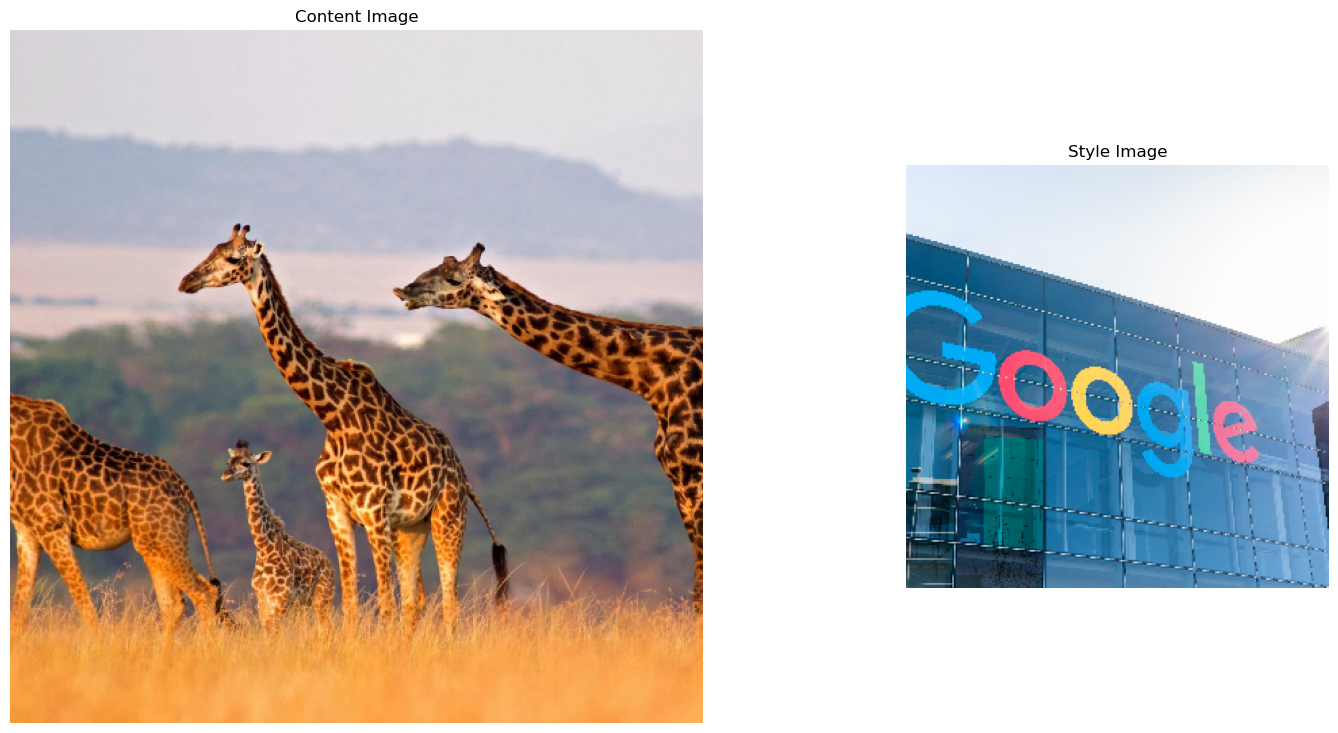

In [134]:
show_n([content_image, style_image], ['Content Image', 'Style Image'])

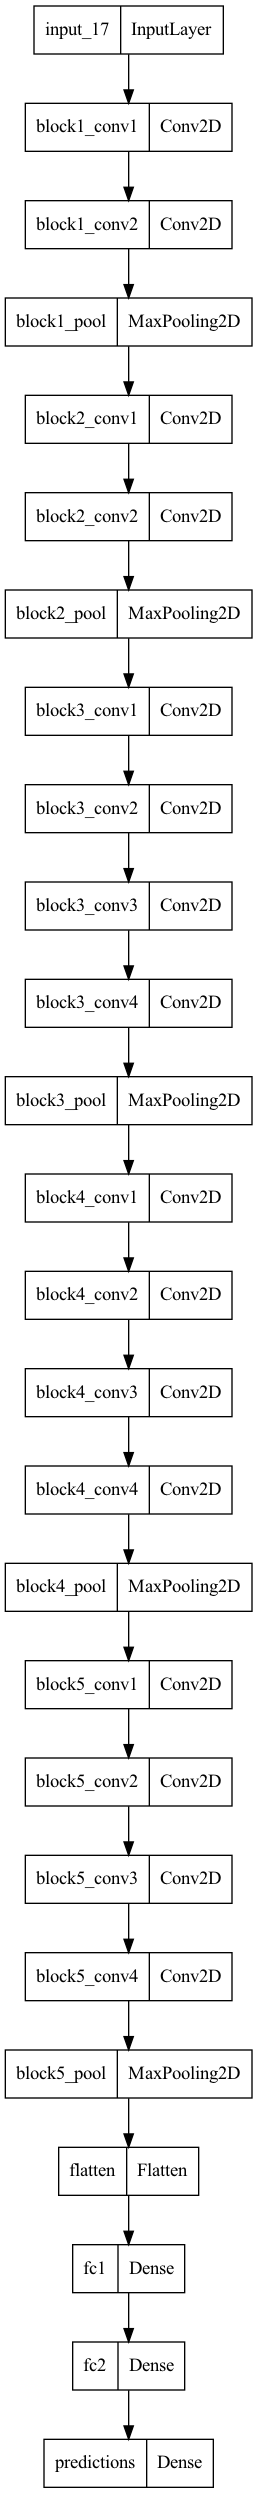

In [135]:
tf.keras.utils.plot_model(
    tf.keras.applications.VGG19(include_top=True, weights='imagenet'))

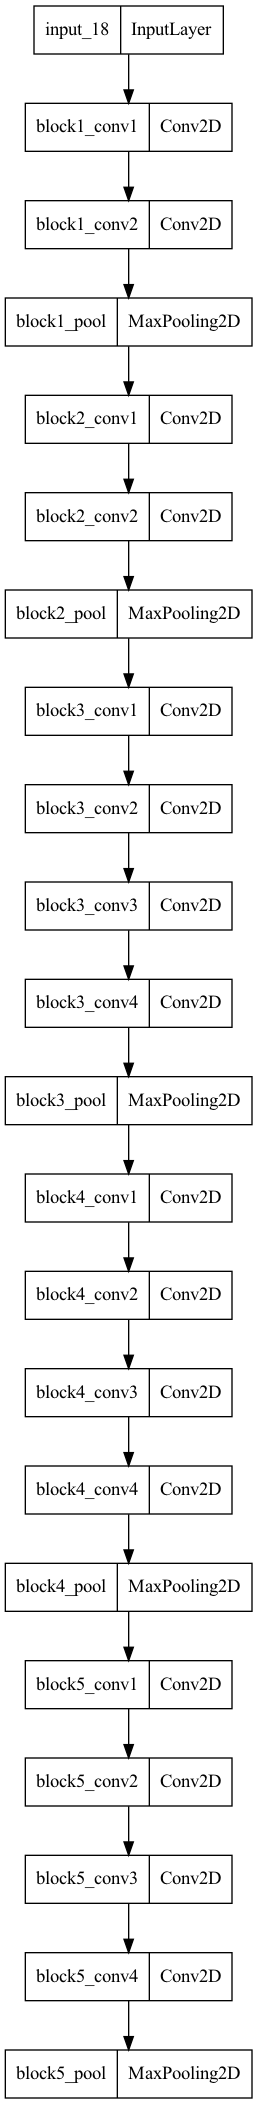

In [136]:
tf.keras.utils.plot_model(
    tf.keras.applications.VGG19(include_top=False, weights='imagenet'))

In [137]:
for layer in tf.keras.applications.VGG19(include_top=False, weights='imagenet').layers:
    print(layer.name)

input_19
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


#Define Model 

In [138]:
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

content_layers = ['block5_conv2']

In [139]:
def gram_matrix(input_tensor):
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def vgg_layers(layer_names):

  vgg =  tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)

  return model

class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)

    outputs = self.vgg(preprocessed_input)

    style_outputs , content_outputs = (outputs[:self.num_style_layers], 
                                       outputs[self.num_style_layers:])
    
    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict =  {content_name: value for content_name, value in 
                     zip(self.content_layers, content_outputs)}

    style_dict =  {style_name: value for style_name, value in 
                     zip(self.style_layers, style_outputs)}


    return {'content': content_dict, 'style': style_dict}

#Training and generation


In [140]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

extractor = StyleContentModel(style_layers, content_layers)

style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

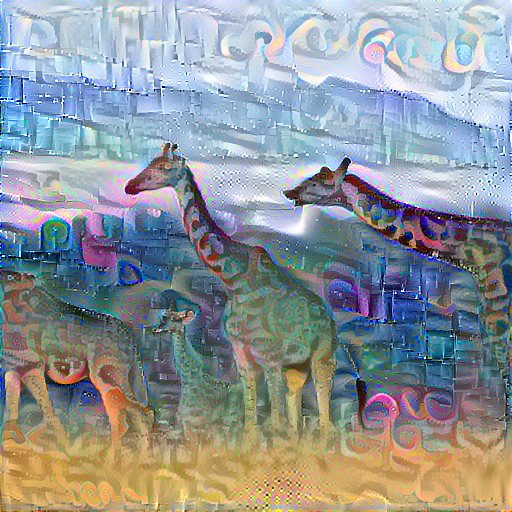

Train step: 500


In [149]:
!rm stylized-image-*.png

def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)


style_weight=1e-2
content_weight=1e3

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']

    style_loss = tf.add_n([tf.reduce_mean(tf.square((style_outputs[name]-style_targets[name]))) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean(tf.square((content_outputs[name]-content_targets[name]))) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers

    loss = style_loss + content_loss
    return loss

opt = tf.optimizers.Adam(learning_rate=0.01, beta_1=0.99, epsilon=1e-1)

total_variation_weight=50
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

image = tf.Variable(content_image)
#image = tf.Variable(np.random.rand(1,256,256,3))

epochs = 5 #10
steps_per_epoch = 100
max_step = epochs * steps_per_epoch 
step_to_save = max_step*0.1

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
    if step%step_to_save ==0:
        print(f'STEP: {step} SAVING..')
        file_name = "./output/"+f'stylized-image-{step}.png'
        file_name
        tensor_to_image(image).save(file_name)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

In [148]:
# @title Save and download generated image...  { display-mode: "form" }

print('SAVING AND DOWNLOADING GENERATED IMAGE...')
file_name = "./output/"+f'stylized-image-{step}.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download("./output"+file_name)

print('SAVING AND DOWNLOADING GENERATED IMAGE DONE')

SAVING AND DOWNLOADING GENERATED IMAGE...
SAVING AND DOWNLOADING GENERATED IMAGE DONE


  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/gx/v5v_dlc54t1f_kvrpy2n9zfw0000gn/T/ipykernel_55479/2865284640.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
100%|██████████| 10/10 [00:00<00:00, 130.19it/s]
/var/folders/gx/v5v_dlc54t1f_kvrpy2n9zfw0000gn/T/ipykernel_55479/2865284640.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



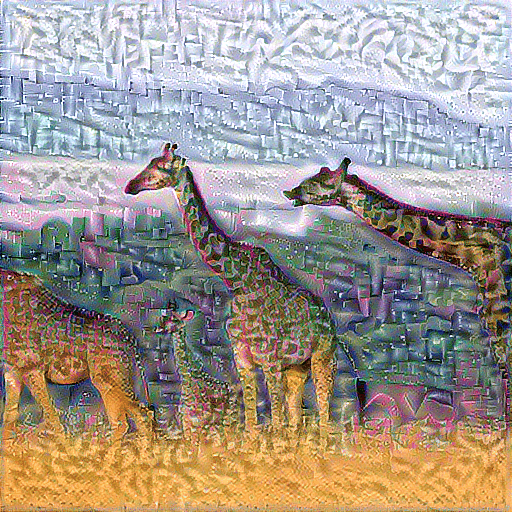

In [152]:
# @title Generate, save and download animated GIF... { display-mode: "form" }

anim_file = './output/stylized-image.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('./output/stylized-image-*.png')
  filenames = sorted(filenames)
  for filename in tqdm(filenames):
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
  
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download("./output"+anim_file)

embed.embed_file(anim_file)

#Fast Style

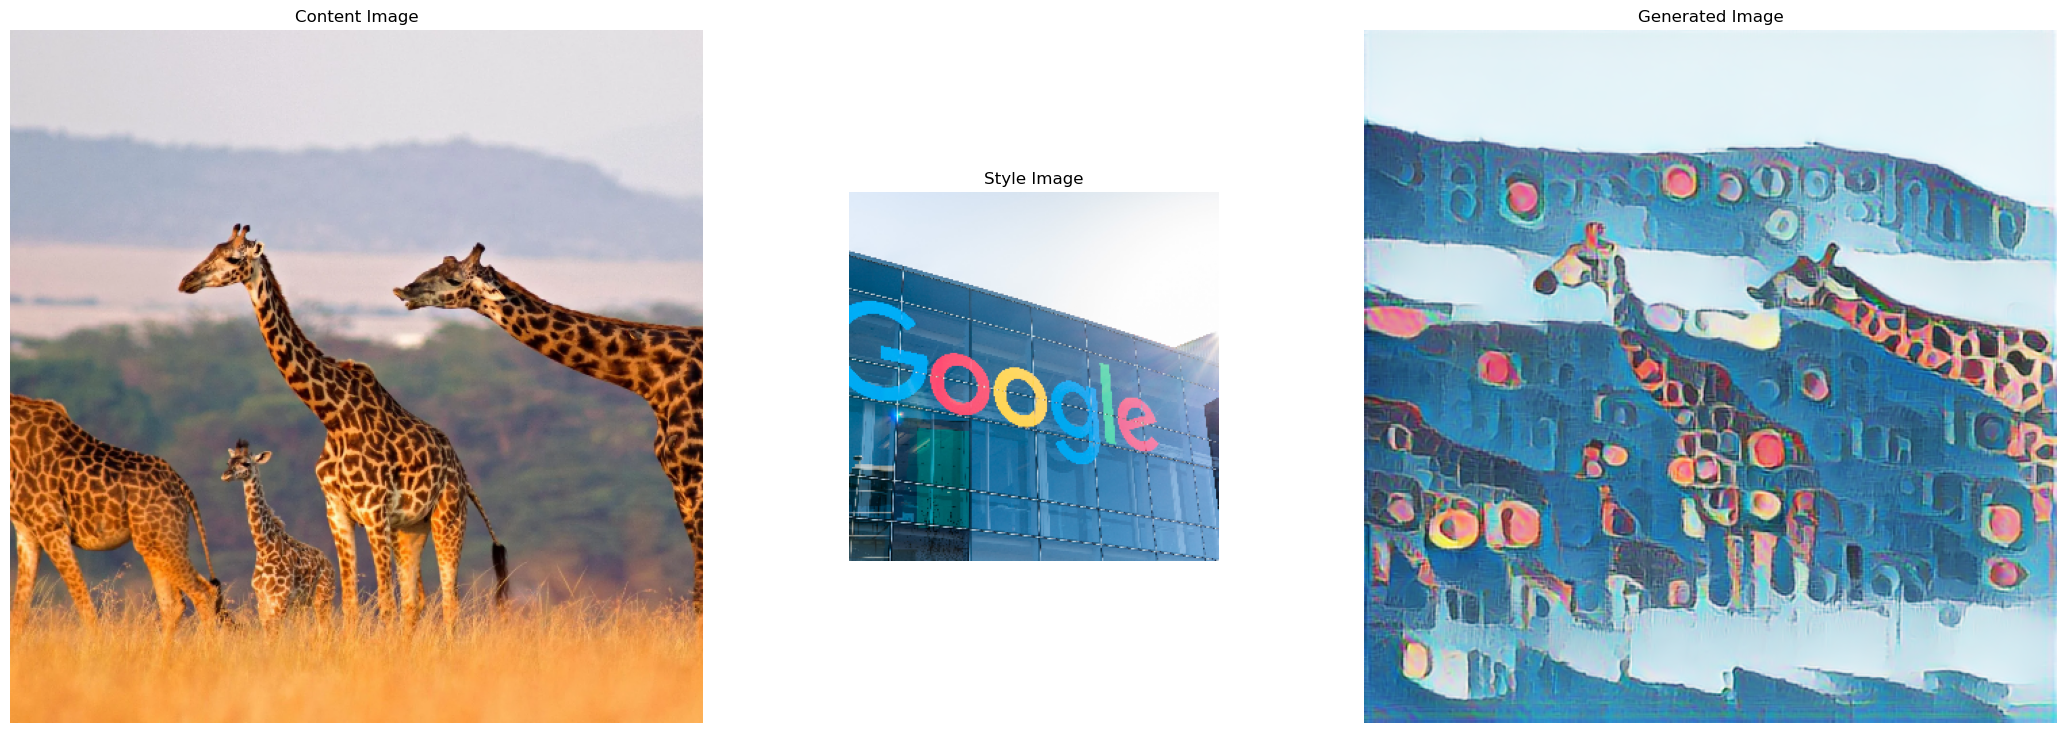

In [153]:
#https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
generated_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
#tensor_to_image(stylized_image)
tensor_to_image(content_image).save('./output/content_image.jpg')
tensor_to_image(style_image).save('./output/style_image.jpg')
tensor_to_image(generated_image).save('./output/generated_image.jpg')


try:
  from google.colab import files
except ImportError:
   pass
else:
  for file_ in ['content_image.jpg', 'style_image.jpg', 'generated_image.jpg']:
    files.download(file_)

show_n([content_image, style_image, generated_image], titles=['Content Image', 'Style Image', 'Generated Image'])

In [ ]:
generated_image